# Introduction
- Understand the Sample dataset and perform pre-process on it. 
- Perform Exploratary Data Analysis and Select the important features.
- Make a sample ML model for Predicting suitable solution(Product) on the basis of test parameters.
- Input = n-number of Parameters
- Output = Product Class [Agtech,RightAngle,Openlink,Allegro]

# Import libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Python 3 environment
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/company-dataset/Big_startup_succees_dataset.csv
/kaggle/input/company-dataset/Big_Companies1000.csv
/kaggle/input/commodities-dataset/Commodities_Comparables.xlsx


In [2]:
df_orignal = pd.read_excel('/kaggle/input/commodities-dataset/Commodities_Comparables.xlsx')
df = df_orignal

In [3]:
df.head()

,Client,Solution,Industry,Sector,Region,User Count,Delivery,Commodities_Traded__c
0,6085551,Agtech,Agriculture & CPG,Processor,Americas,7.0,NaN,"Grains & Oilseeds;Biofuels;C&S (RINs, LCFS, RTFO)"
1,9545824,Agtech,Agriculture & CPG,Originator,Americas,3.0,NaN,Grains & Oilseeds
2,8676609,Agtech,Agriculture & CPG,Trader,Americas,40.0,NaN,Grains & Oilseeds
3,5760132,Agtech,Agriculture & CPG,Processor,Americas,20.0,NaN,"Grains & Oilseeds;Biofuels;C&S (RINs, LCFS, RTFO)"
4,1720710,Allegro,Utilities & Power,Utility,Americas,75.0,NaN,"Power - Americas;Emissions;C&S (RINs, LCFS, RTFO)"


# EDA

In [4]:
print(df.columns)
print(df.info())
df.describe()

Index(['Client', 'Solution', 'Industry', 'Sector', 'Region', 'User Count',
       'Delivery', 'Commodities_Traded__c'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client                 711 non-null    int64  
 1   Solution               711 non-null    object 
 2   Industry               711 non-null    object 
 3   Sector                 711 non-null    object 
 4   Region                 711 non-null    object 
 5   User Count             555 non-null    float64
 6   Delivery               7 non-null      object 
 7   Commodities_Traded__c  624 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 44.6+ KB
None


,Client,User Count
count,7.110000e+02,555.000000
mean,5.859930e+06,132.178378
std,2.300020e+06,853.721582
min,1.720710e+06,0.000000
25%,3.865016e+06,8.000000
50%,6.056809e+06,20.000000
75%,7.802822e+06,60.500000
max,9.711145e+06,9999.000000


In [5]:
df.rename(columns={'User Count':'User_Count','Commodities_Traded__c':'Commodities_Traded' },inplace=True)

In [6]:
df.drop('Delivery',axis=1, inplace=True)
df.head()

,Client,Solution,Industry,Sector,Region,User_Count,Commodities_Traded
0,6085551,Agtech,Agriculture & CPG,Processor,Americas,7.0,"Grains & Oilseeds;Biofuels;C&S (RINs, LCFS, RTFO)"
1,9545824,Agtech,Agriculture & CPG,Originator,Americas,3.0,Grains & Oilseeds
2,8676609,Agtech,Agriculture & CPG,Trader,Americas,40.0,Grains & Oilseeds
3,5760132,Agtech,Agriculture & CPG,Processor,Americas,20.0,"Grains & Oilseeds;Biofuels;C&S (RINs, LCFS, RTFO)"
4,1720710,Allegro,Utilities & Power,Utility,Americas,75.0,"Power - Americas;Emissions;C&S (RINs, LCFS, RTFO)"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Client              711 non-null    int64  
 1   Solution            711 non-null    object 
 2   Industry            711 non-null    object 
 3   Sector              711 non-null    object 
 4   Region              711 non-null    object 
 5   User_Count          555 non-null    float64
 6   Commodities_Traded  624 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 39.0+ KB


In [8]:
df_p = df.dropna(subset=['User_Count'])
df_p.reset_index(drop=True, inplace=True)
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Client              555 non-null    int64  
 1   Solution            555 non-null    object 
 2   Industry            555 non-null    object 
 3   Sector              555 non-null    object 
 4   Region              555 non-null    object 
 5   User_Count          555 non-null    float64
 6   Commodities_Traded  552 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 30.5+ KB


In [9]:
def count_unique(df):
    print("Column_ID VS Unique_Values\n")
    for i in df.columns:
        print(i,"-"*(25-(len(i))),df[i].nunique())
count_unique(df_p)

Column_ID VS Unique_Values

Client ------------------- 555
Solution ----------------- 4
Industry ----------------- 15
Sector ------------------- 31
Region ------------------- 3
User_Count --------------- 142
Commodities_Traded ------- 173


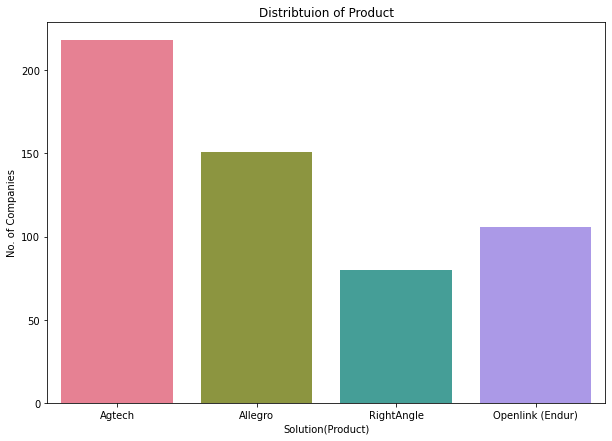

In [10]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data = df_p, x="Solution",palette="husl")
ax.set(xlabel='Solution(Product)', ylabel='No. of Companies', title='Distribtuion of Product')
plt.show()


Interpretation: Most of the customers use Agtech

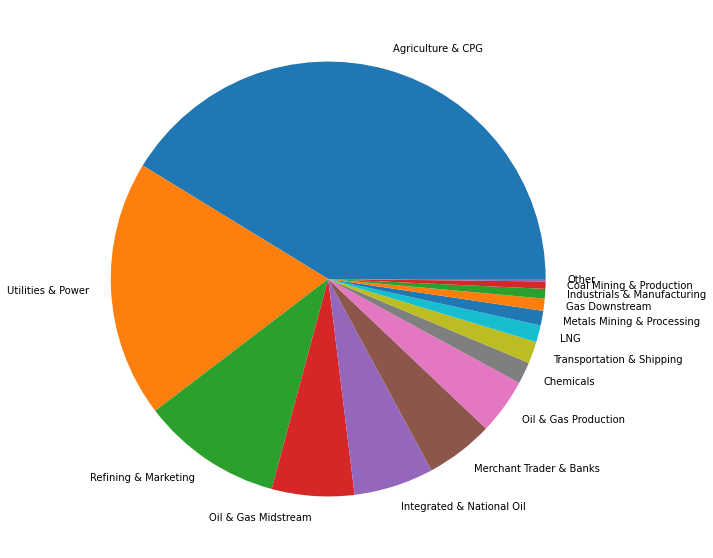

In [11]:
plt.figure(figsize=(10,10))
plt.pie(df_p['Industry'].value_counts(),labels = df_p['Industry'].value_counts().index)
plt.show()

Interpretation: Most of the Customers belong to Agriculture followed by Utitlies&Power

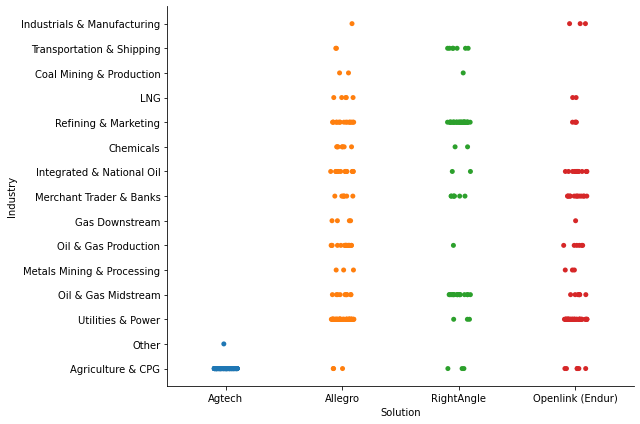

In [12]:
sns.catplot(data=df_p, x="Solution", y="Industry", kind="strip", height=6, aspect=1.5)
plt.show()

Interpretation: Agtech is the goto Solution for Agriculture and CP, whereas RightAngle is widely used by companies in the industries of Refining, Oil & Gas.

In [13]:
# from plotnine import ggplot, aes, geom_point
# ggplot(df_p) + aes(x="Solution", y="Industry")+ geom_point()

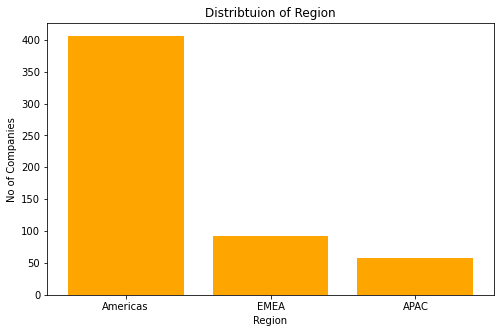

In [14]:
names = df_p["Region"].value_counts().keys()
counts = df_p["Region"].value_counts().values
plt.subplots(figsize=(8, 5))
plt.bar(names, counts, color="orange")
plt.xlabel("Region")
plt.ylabel("No of Companies")
plt.title("Distribtuion of Region")
plt.show()

Interpretation: Most of the companies using our Solution belong to Americas

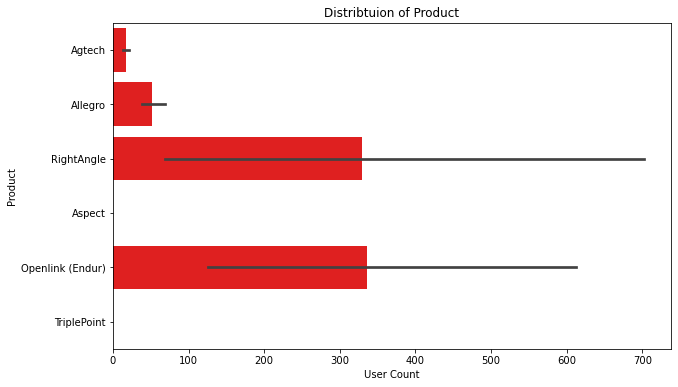

In [15]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data = df, x="User_Count", y ="Solution" ,color='red')
ax.set(xlabel='User Count', ylabel='Product', title='Distribtuion of Product')
plt.show()

Interpretation: In terms of User count Openlink and RightAngle tops.

### Dealing with categorical variables 
1. One hot encoding
2. Replace NAN values
3. Rename columns
4. Selection of target Variables

In [16]:
import category_encoders as ce
one_hot = ce.OneHotEncoder(cols=['Industry','Region'])
df_one_hot = one_hot.fit_transform(df_p[['Industry','Region']]).reset_index(drop=True)
df_one_hot

,Industry_1,Industry_2,Industry_3,Industry_4,Industry_5,Industry_6,Industry_7,Industry_8,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13,Industry_14,Industry_15,Region_1,Region_2,Region_3
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
551,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
df_p = pd.concat([df_p,df_one_hot],axis=1).drop(['Industry','Region'],axis=1)
df_p.head()

,Client,Solution,Sector,User_Count,Commodities_Traded,Industry_1,Industry_2,Industry_3,Industry_4,Industry_5,...,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13,Industry_14,Industry_15,Region_1,Region_2,Region_3
0,6085551,Agtech,Processor,7.0,"Grains & Oilseeds;Biofuels;C&S (RINs, LCFS, RTFO)",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9545824,Agtech,Originator,3.0,Grains & Oilseeds,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,8676609,Agtech,Trader,40.0,Grains & Oilseeds,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5760132,Agtech,Processor,20.0,"Grains & Oilseeds;Biofuels;C&S (RINs, LCFS, RTFO)",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1720710,Allegro,Utility,75.0,"Power - Americas;Emissions;C&S (RINs, LCFS, RTFO)",0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Client              555 non-null    int64  
 1   Solution            555 non-null    object 
 2   Sector              555 non-null    object 
 3   User_Count          555 non-null    float64
 4   Commodities_Traded  552 non-null    object 
 5   Industry_1          555 non-null    int64  
 6   Industry_2          555 non-null    int64  
 7   Industry_3          555 non-null    int64  
 8   Industry_4          555 non-null    int64  
 9   Industry_5          555 non-null    int64  
 10  Industry_6          555 non-null    int64  
 11  Industry_7          555 non-null    int64  
 12  Industry_8          555 non-null    int64  
 13  Industry_9          555 non-null    int64  
 14  Industry_10         555 non-null    int64  
 15  Industry_11         555 non-null    int64  
 16  Industry

In [19]:
#Utitily Functions
def plot_decision_boundary(model, X, y):
    x1, x2 = X[:, 0], X[:, 1]
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(x1, x2, c=y, marker='o',
                s=25, edgecolor='k');
    
def get_Prediction(model,imp_var,inp): #list of input vector
    try:
        Output_Class, Output_Class_Prob = None,None
        Input=pd.DataFrame([inp],columns=imp_var) # input : [User_count]
        Output_Class=model.predict(Input) # output:[class]
        Output_Class_Prob=model.predict_proba(Input)
        return Output_Class, Output_Class_Prob
    except:
        print("Length of input feature vector should be equal to imp_var!")



# Classification Model
- Random Forest Classifier
- K-Nearest Neighbour Classifier

#### Random Forest

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import sklearn.metrics as metrics

In [21]:
df_p.columns

Index(['Client', 'Solution', 'Sector', 'User_Count', 'Commodities_Traded',
       'Industry_1', 'Industry_2', 'Industry_3', 'Industry_4', 'Industry_5',
       'Industry_6', 'Industry_7', 'Industry_8', 'Industry_9', 'Industry_10',
       'Industry_11', 'Industry_12', 'Industry_13', 'Industry_14',
       'Industry_15', 'Region_1', 'Region_2', 'Region_3'],
      dtype='object')

In [22]:
# Set variables for the targets and features
imp_var = ["User_Count","Region_1","Region_2","Region_3",'Industry_6', 'Industry_7', 'Industry_8', 'Industry_9', 'Industry_10',
       'Industry_11', 'Industry_12', 'Industry_13', 'Industry_14','Industry_15']
X = df_p[imp_var]
Y = df_p['Solution']


# Split 
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state=7)

In [23]:
model = RandomForestClassifier(random_state=7, n_estimators=100)
model.fit(train_X, train_Y)

RandomForestClassifier(random_state=7)

# Evaluation Metrics

In [24]:
# Accuracy
pred_Y = model.predict(val_X)
accuracy = metrics.accuracy_score(val_Y, pred_Y)
print('Accuracy of Random-Forest classifier on training set: {:.2f}'
     .format(model.score(train_X, train_Y)))
print('Accuracy of Random-Forest classifier on test set: {:.2f}'
     .format(model.score(val_X, val_Y)))

Accuracy of Random-Forest classifier on training set: 0.87
Accuracy of Random-Forest classifier on test set: 0.50


Confusion matrix:
[[46  7  4  2]
 [15 13  6  3]
 [ 3  9  6  3]
 [ 7  5  6  4]]

Normalized confusion matrix:
[0.77966102 0.11864407 0.06779661 0.03389831]
[0.40540541 0.35135135 0.16216216 0.08108108]
[0.14285714 0.42857143 0.28571429 0.14285714]
[0.31818182 0.22727273 0.27272727 0.18181818]


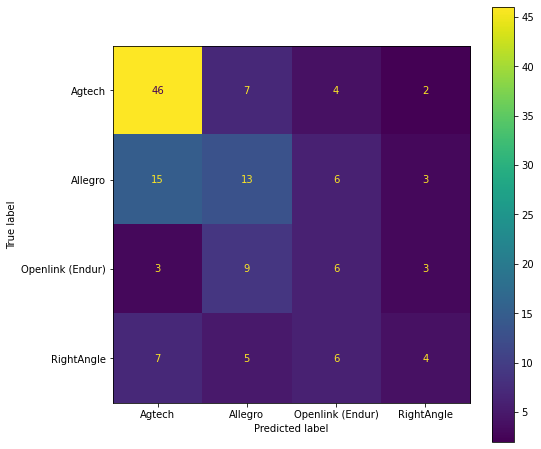

In [25]:
# Calculate the confusion matrix 
confusion = metrics.confusion_matrix(val_Y, pred_Y)
print(f"Confusion matrix:\n{confusion}")

print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

plt.figure(figsize=(8,8))
ax=plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(val_Y,pred_Y,ax=ax)
plt.show()


In [26]:

Output_Class=model.predict(val_X.iloc[[0]]) # output:[class]
Output_Class_Prob=model.predict_proba(val_X.iloc[[0]])
print(Output_Class, Output_Class_Prob)

Output_Class,Output_Class_Prob = get_Prediction(model,imp_var,val_X.iloc[0].tolist())
print(Output_Class,Output_Class_Prob)# Output_Class_Prob)

['Agtech'] [[0.52652778 0.         0.47347222 0.        ]]
['Agtech'] [[0.52652778 0.         0.47347222 0.        ]]


### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier().fit(train_X, train_Y)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_clf.score(train_X, train_Y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_clf.score(val_X, val_Y)))

Output_Class,Output_Class_Prob = get_Prediction(knn_clf,imp_var,val_X.iloc[0].tolist())
print(Output_Class,Output_Class_Prob)# Output_Class_Prob)

Accuracy of K-NN classifier on training set: 0.62
Accuracy of K-NN classifier on test set: 0.50
['Agtech'] [[0.4 0.  0.4 0.2]]


#